## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [79]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [80]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [81]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [82]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [83]:
df.query("converted == 1").user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [84]:
df.query("landing_page == 'old_page' and group == 'treatment' or landing_page == 'new_page' and group == 'control' ").user_id.nunique()

3893

f. Do any of the rows have missing values?

In [85]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [86]:
df2 = df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"  ')

In [87]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [88]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [89]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### Boolean Mask

In [90]:
id_counts = df2.user_id.value_counts()
dupe_mask = id_counts == 2
dupe_id = id_counts.index[dupe_mask]
dupe_id

Int64Index([773192], dtype='int64')

In [91]:
df2.loc[df2['user_id'].isin(dupe_id),:]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [92]:
df2.loc[df2['user_id'].isin(dupe_id),:]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [93]:
df2 = df2.drop_duplicates()

In [94]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [95]:
df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [96]:
prob_control = df2[df2['group']=='control']['converted'].mean()
prob_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [97]:
prob_treatment = df2[df2['group']=='treatment']['converted'].mean()
prob_treatment

0.11880724790277405

d. What is the probability that an individual received the new page?

In [98]:
df2.query("landing_page == 'new_page'").user_id.nunique() / df2.shape[0]

0.5000602233425676

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**

- The mean average for conversions regardless the page and group is small.
- The convertion rate in control group is higher than in treatment group.
- The difference in convertion rate between two groups is so small.
- We can't decide the old page leads more conversions because of small diffrence, so these two pages have similar performance.
- It seems that, there is no evidence that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: \ p_{new} <= \ p_{old} $$


$$H_1: \ p_{new} > \ p_{old} $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [99]:
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [100]:
p_old = df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [101]:
n_new = df2.query("group =='treatment'").user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [102]:
n_old = df2.query("group =='control'").user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [103]:
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.8797880393641181

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [104]:
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.8813552321819459

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [105]:
p_diff = new_page_converted.mean()  - old_page_converted.mean()
p_diff

-0.0015671928178278005

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [106]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [107]:
org_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
org_diff

-0.0015790565976871451

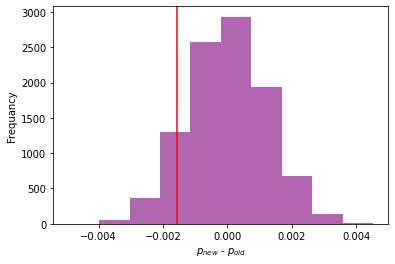

In [108]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs,alpha=0.6,color='purple')
plt.axvline(org_diff, color='r')
plt.xlabel("$p_{new}$ - $p_{old}$")
plt.ylabel("Frequancy");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [109]:
actual_diffs = df2.query("landing_page == 'new_page'").converted.mean() - df2.query("landing_page=='old_page'").converted.mean()
(p_diffs > actual_diffs).mean()

0.9052

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

**-The probability for the Null Hypothesis to be true is called** P_value **this value when it becomes more than 0.05 which is Type I error threshold, we** Fail to reject Null Hypthoesis.

**-Herewe can find that p-value is 0.90 so we fail to reject null hypthosis.**

**-We can make a decision that the old page's performance is better than or the same as the new page's performance, as we supposed in null hypothesis** 
$$H_0: \ p_{old} >= \ p_{new} $$

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [110]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted == 1").count()[0]
convert_new = df2.query("group == 'treatment' and converted == 1").count()[0]
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [111]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3116075339133115, 0.905173705140591)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [112]:
from scipy.stats import norm
print(norm.cdf(z_score))   # shows the significance of the z_score

print(norm.ppf(1-(0.05))) # this tells us our critical value at 95% confidence interval

0.905173705140591
1.6448536269514722


**Answer:**

 **z_score is 1.311 so it's less than our critical value at 95% confidence interval 1.6448, so, we would fail to reject the Null; which is the same results in j & k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [113]:
# create an intercept column
df2['intercept'] = 1

# Create a dummy variable
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [114]:
logreg_model = sm.Logit(df2['converted'] , df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [115]:
result = logreg_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.6032
Date:               2021-01-12 23:56 BIC:              212801.7625
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290583           LLR p-value:      0.18965    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897

In [116]:
np.exp(result.params)

intercept    0.136863
ab_page      0.985115
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**

**P-value = 0.189**

$$H_0: p_{new} − p_{old}=0$$
$$H_1: p_{new} − p_{old}≠0$$

**The difference is,in the logistic regression part, it is two-sided test but in part II, we performed a one-sided test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

**Usually terms like (age,salary) maybe infuluence the model**

**Disadvantages to adding additional terms like Multicollinearity (that these terms may be correlated to one another) and if the linear relationship exists or not.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [117]:
df3 = pd.read_csv("countries.csv")
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [118]:
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [119]:
df3[['US','UK']] = pd.get_dummies(df3['country'])[['US','UK']]
df3.tail(5)

,user_id,country,US,UK
290579,653118,US,1,0
290580,878226,UK,0,1
290581,799368,UK,0,1
290582,655535,CA,0,0
290583,934996,UK,0,1


In [120]:
df_new = df2.join(df3.set_index('user_id'), on='user_id')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0


In [121]:
logreg_model2 = sm.Logit(df_new['converted'] , df_new[['intercept','US','UK']])

In [122]:
result2 = logreg_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.0880
Date:               2021-01-12 23:56 BIC:              212812.8269
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.19834    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5176  0.1291

In [123]:
np.exp(result2.params)

intercept    0.130350
US           1.041641
UK           1.052027
dtype: float64

In [124]:
1/np.exp(result2.params)

intercept    7.671651
US           0.960024
UK           0.950546
dtype: float64

**Based on results above, we can say, there is no significant effect on the convertion based on the country.**

**Interpretation of the previous logistic model**

1.If an individual is from CA, it is 0.96 times more likely to make a conversion than if he is from US , holding all other variables constant.

2-If an individual is from CA, it is 0.95 times more likely to make a conversion than if he is from UK , holding all other variables constant.

3-From these values which is very close to 1 time, we can notice that there is no influence on the conversion rate comes from the country variable.

In [125]:
logreg_model3 = sm.Logit(df_new['converted'] , df_new[['intercept','ab_page','US','UK']])

In [126]:
result3 = logreg_model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2021-01-12 23:56 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910

In [127]:
np.exp(result3.params)

intercept    0.131332
ab_page      0.985160
US           1.041593
UK           1.051944
dtype: float64

In [128]:
1/ np.exp(result3.params)

intercept    7.614274
ab_page      1.015064
US           0.960068
UK           0.950621
dtype: float64

**We can interpret the result like this:**

1. if an indivisual uses the new page, it is 1.015 more likely to make a conversion than if he uses the old page, holding all other variables constant.

2. If an indivisual is from CA , it is 0.96 more likely to make a conversion than if he is from US, holding all other variables constant.

3. If an indivisual is from CA , it is 0.95 more likely to make a conversion than if he is from UK, holding all other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [129]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']

In [130]:
logreg_model4 = sm.Logit(df_new['converted'] , df_new[['intercept','ab_page','UK','US','ab_UK','ab_US']])

In [131]:
result4 = logreg_model4.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.9124
Date:               2021-01-12 23:56 BIC:              212846.3903
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.19182    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947

In [132]:
np.exp(result4.params)

intercept    0.134794
ab_page      0.934776
UK           1.011854
US           1.017682
ab_UK        1.081428
ab_US        1.047989
dtype: float64

In [133]:
1/np.exp(result4.params)

intercept    7.418713
ab_page      1.069775
UK           0.988285
US           0.982625
ab_UK        0.924703
ab_US        0.954208
dtype: float64

**Based on results above, we can say too, there is no significant effect on the convertion if an individual uses one of tha pages and was in specific country.**

**Interpreting the interaction model:**

1.If an individual is from CA and use a new page, he is 0.9247 times more likely to make a conversion than if he is from UK and using the new page , holding all other variables constant.

2.If an individual is from CA and use a new page, he is 0.9542 times more likely to make a conversion than if he is from US and use a new page , holding all other variables constant.

3.there is no influence in the conversion rate if an indivisual uses old page or new page, or if he is in a specific country or other country.

4.there is no diffrence in the conversion rate if an indivisual uses one of the pages and he is in a specific country.

## Conclusion

**Based on the three cases that I used to build my decision, I can recommend to e-commerce company to keep the old page.**

**I didn't find an evidence tell that new page can perform better than the old, so I failed to reject the null hypothesis which I supposed it.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [134]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0